<a href="https://colab.research.google.com/github/pedrodeparis/Python-Data-Analysis-RFM/blob/main/Analysis_RFM_E_COMMERCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import pandas as pd
import numpy as np


In [64]:
#dificuldade para leitura do arquivo, utilizei o codec 'latin-1'.

df = pd.read_csv('data.csv', encoding='latin-1')


In [65]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [66]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [67]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [69]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [70]:
df = df.dropna(subset=['CustomerID'])

In [71]:
print(len(df[df['UnitPrice'] <= 0]))
print(len(df[df['Quantity'] <= 0]))

40
8905


In [72]:
df = df[(df['UnitPrice'] >= 0)]

In [73]:
df.duplicated().sum()
df = df.drop_duplicates()

In [74]:
df['CustomerID'] = df['CustomerID'].astype(int)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

<ipython-input-74-194cca8f2572>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CustomerID'] = df['CustomerID'].astype(int)


In [75]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France


In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
from sklearn.preprocessing import scale, minmax_scale, power_transform

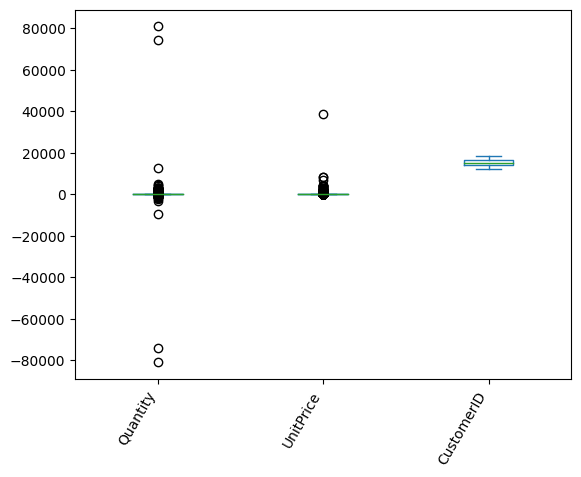

In [78]:
df.plot.box()
plt.xticks(rotation=60, ha='right');

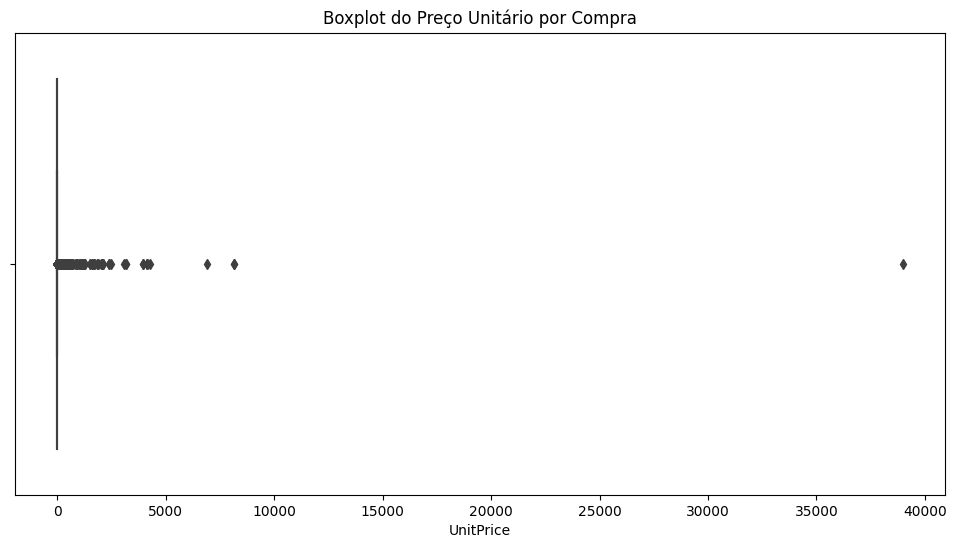

In [80]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='UnitPrice', data=df)
plt.title('Boxplot do Preço Unitário por Compra')
plt.show()

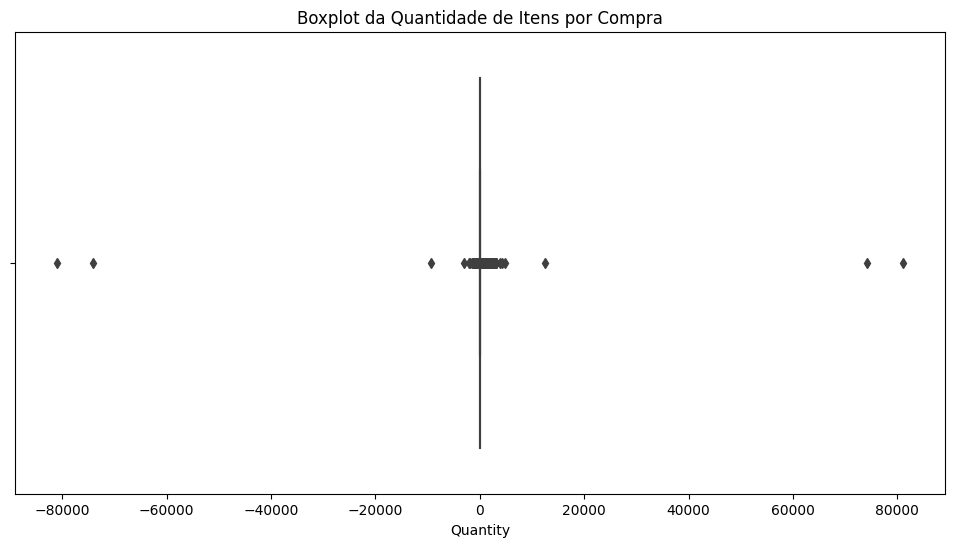

In [81]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Quantity', data=df)
plt.title('Boxplot da Quantidade de Itens por Compra')
plt.show()

In [82]:
df = df[(df['Quantity'] <= 10000) & (df['UnitPrice'] <= 5000)]

In [84]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

<ipython-input-84-18878337d6d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


In [86]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [90]:
last_purchase_date = df['InvoiceDate'].max()
print(last_purchase_date)

2011-12-09 12:50:00


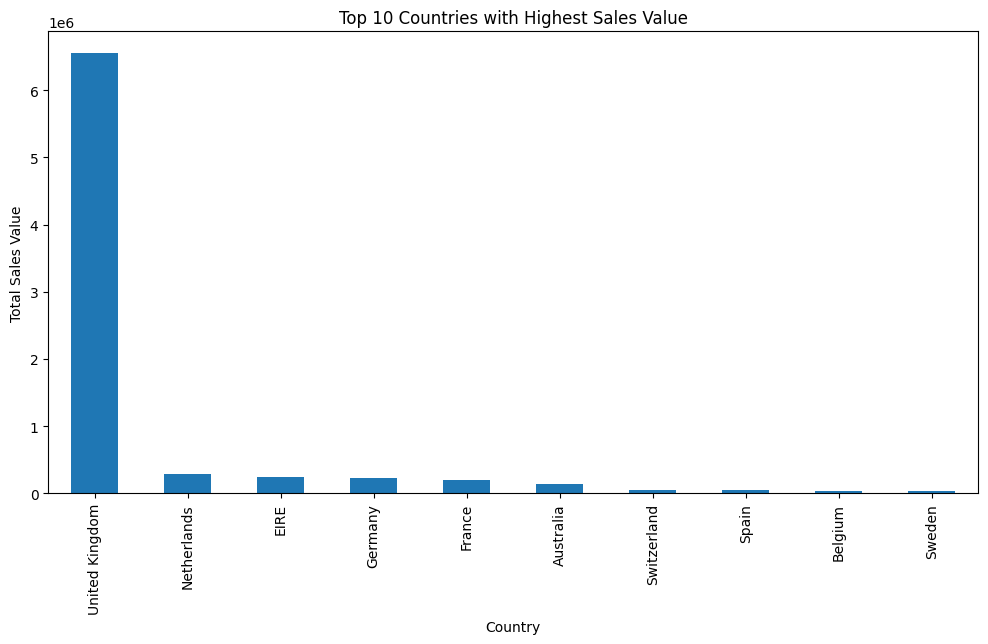

In [92]:
top_countries = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)
top_countries.plot(kind='bar', figsize=(12, 6), title='Top 10 Countries with Highest Sales Value')
plt.ylabel('Total Sales Value')
plt.show()

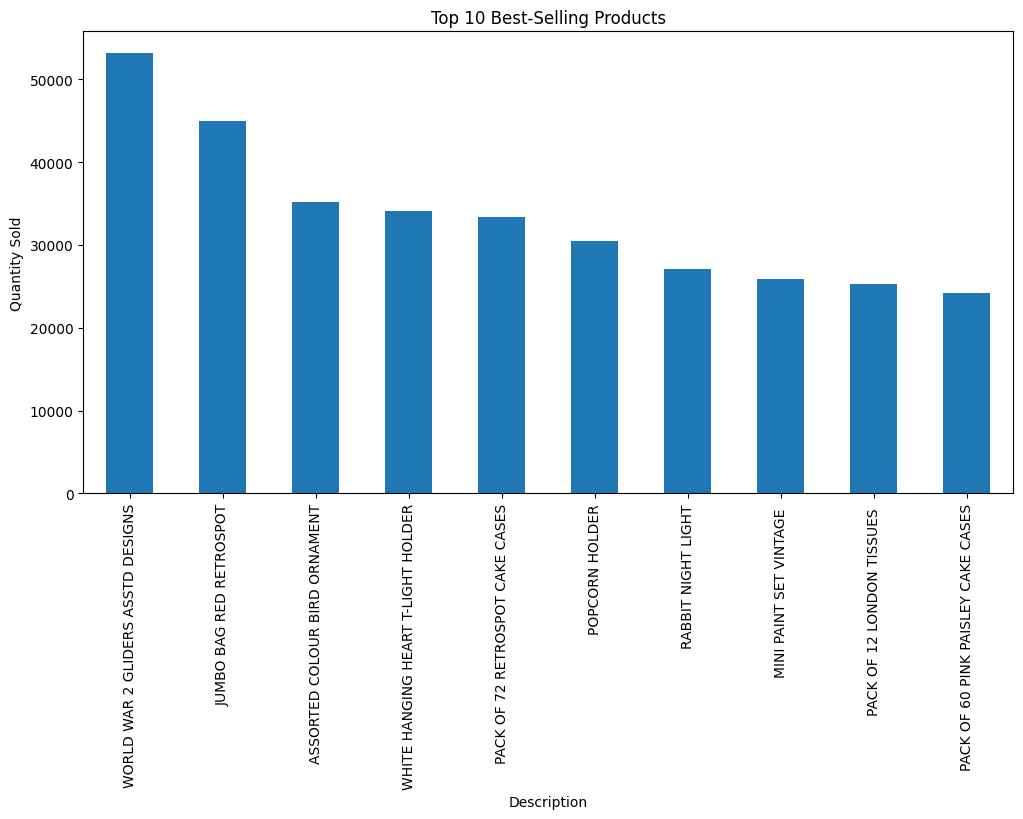

In [93]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', figsize=(12, 6), title='Top 10 Best-Selling Products')
plt.ylabel('Quantity Sold')
plt.show()

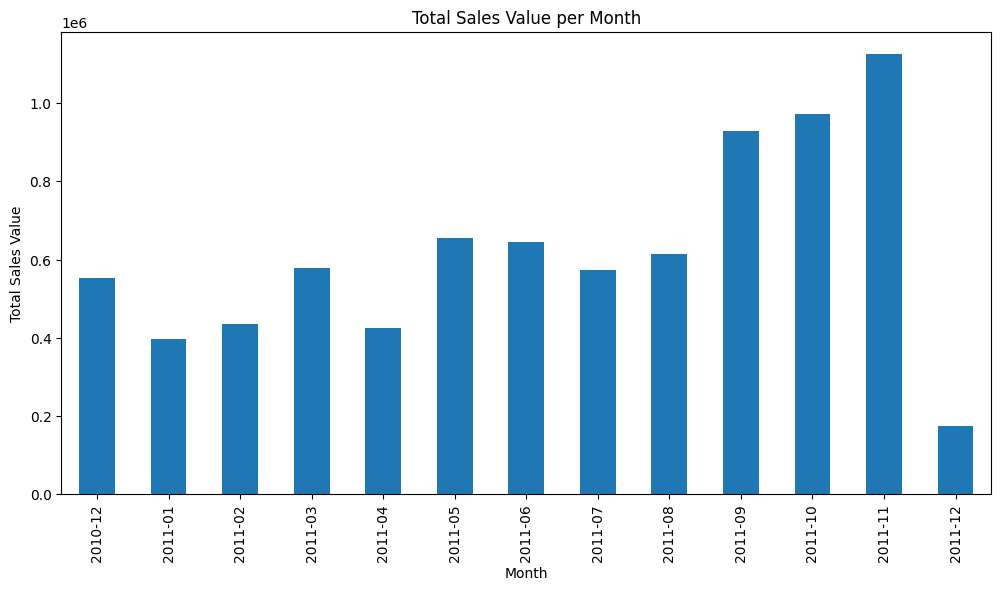

In [94]:
df['Month'] = df['InvoiceDate'].dt.to_period('M')
sales_per_month = df.groupby('Month')['TotalPrice'].sum()
sales_per_month.plot(kind='bar', figsize=(12, 6), title='Total Sales Value per Month')
plt.ylabel('Total Sales Value')
plt.show()

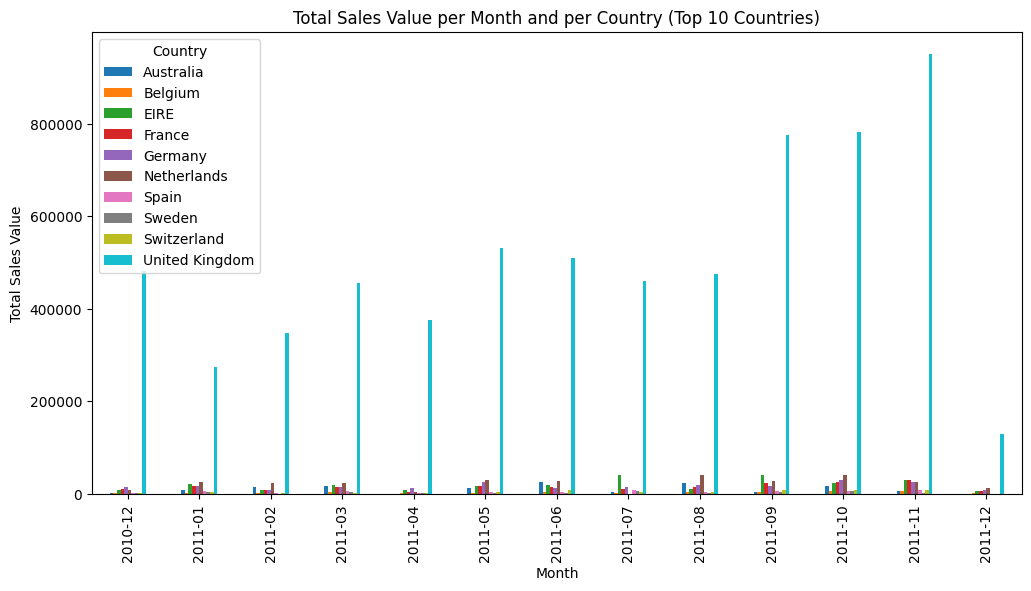

In [95]:
top_countries = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10).index
sales_per_month_country = df[df['Country'].isin(top_countries)].groupby(['Month', 'Country'])['TotalPrice'].sum().unstack()
sales_per_month_country.plot(kind='bar', figsize=(12, 6), title='Total Sales Value per Month and per Country (Top 10 Countries)')
plt.ylabel('Total Sales Value')
plt.show()

In [103]:
grupo_cliente_pedido = df.groupby(['CustomerID', 'InvoiceNo'])

In [104]:
agregado_cliente_pedido = grupo_cliente_pedido.agg({'InvoiceDate': 'max', 'TotalPrice': 'sum'})

In [106]:
grupo_cliente = agregado_cliente_pedido.groupby('CustomerID')
rfm_df = pd.DataFrame()
rfm_df['R'] = (last_purchase_date - grupo_cliente['InvoiceDate'].max()).dt.days
rfm_df['F'] = grupo_cliente.size()
rfm_df['M'] = grupo_cliente['TotalPrice'].mean()

In [99]:
rfm_df.reset_index(inplace=True)

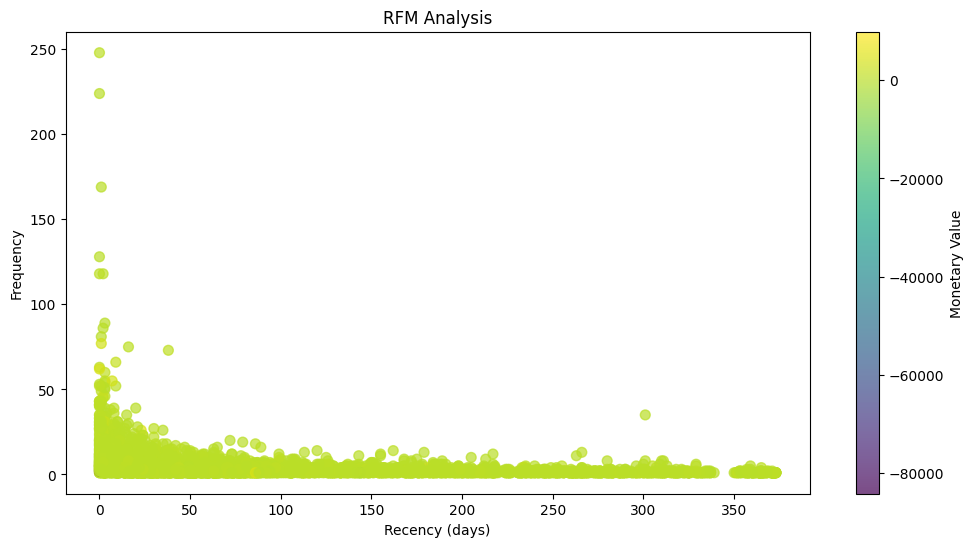

In [102]:
plt.figure(figsize=(12, 6))

plt.scatter(rfm_df['R'], rfm_df['F'], c=rfm_df['M'], cmap='viridis', s=50, alpha=0.7)
plt.title('RFM Analysis')
plt.xlabel('Recency (days)')
plt.ylabel('Frequency')
plt.colorbar(label='Monetary Value')

plt.show()